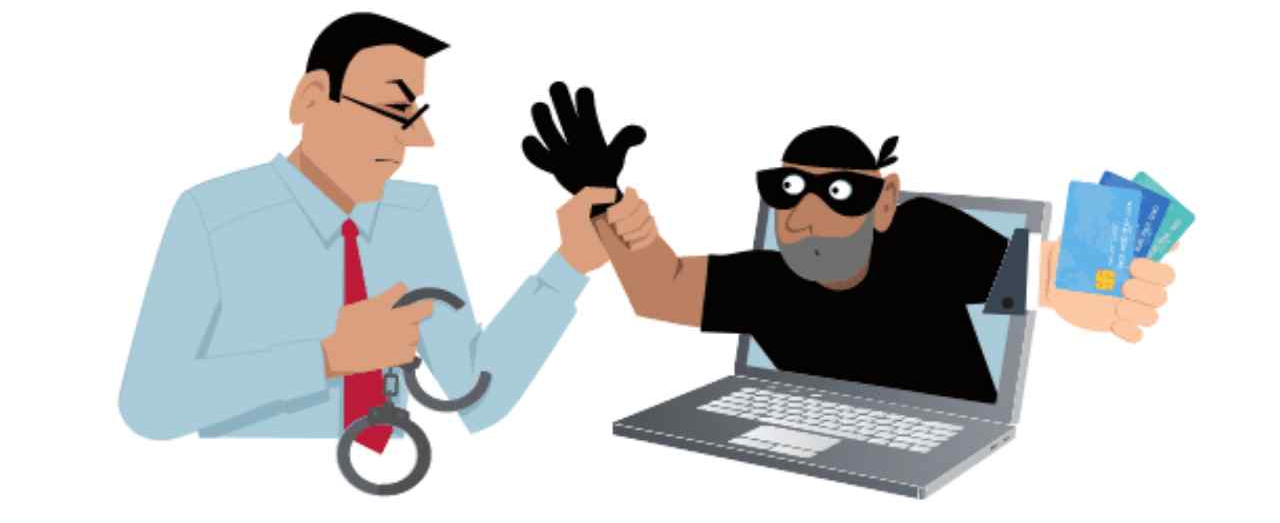

# Credit Crad Fraud Detection using Machine Learning.
by Sarthak Srivastava.

Kindly use [Google Colab](https://colab.google) to run this notebook end to end.

## Introduction to Machine Learning




In simple words Machine learning aka ML is a type of artificial intelligence where computer algorithms automatically learn from provided data and help us predict future values of a similar unseen data.

Machine learning is a branch of artificial intelligence (AI) and computer science which focuses on the use of data and algorithms to imitate the way that humans learn, gradually improving its accuracy

However, with a lots of AI models deployed and ensembling techniques being used it becomes a fairly complicated affair.

## About the scope of the project

In this project, we aim to develop a ML model/models that can effectively detect fraudulent credit card transactions. Credit card fraud is a significant issue that can result in financial losses for both individuals and organizations. Traditional rule-based methods for fraud detection often fall short in detecting sophisticated and evolving fraud patterns.

Machine learning offers a powerful solution by allowing us to train models on historical transaction data (more on the dataset in the next topic) to identify patterns and anomalies associated with fraudulent activities.

We aim to create three different ML models (one baseline and two more sopisticated models) in the following project. Let's get started with the dataset itself!

## About the Dataset



Since getting a real-world data set which contains actual credit card transactions is difficult and confedential, we will be using a simulated data set for this purpose.

This is a simulated credit card transaction dataset containing legitimate and fraud transactions from the duration 1st Jan 2019 - 31st Dec 2020. It covers credit cards of 1000 customers doing transactions with a pool of 800 merchants.

This was generated using [Sparkov Data Generation.](!https://github.com/namebrandon/Sparkov_Data_Generation)


## Importing and installing required python libraries

In [1]:
# opendatasets for downloading dataset from kaggle
!pip install opendatasets --q

# Importing Pandas for dataframe creation and handling
import pandas as pd

#Plotly Express for visulaizations
import plotly.express as px

There are a lot more python libraries and modules used in the project, I have mentioned the same as and when required in the notebook. For begining the project we are good to go with these three.

## Downloading and extracting the Dataset from Kaggle

We are using [opendatasets](https://pypi.org/project/opendatasets/) library which is a Python library for downloading datasets from online sources like Kaggle and Google Drive.

For downloading the data from Kaggle you will require an API key which can be generated from the Kaggle Account settings itself. You can read more on same topic [here.](https://medium.com/mlearning-ai/downloading-datasets-from-kaggle-and-g-drive-430649d519e9)

In [2]:
import opendatasets as od
dataset_url = 'https://www.kaggle.com/datasets/kartik2112/fraud-detection'
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sarthaksrivastava123
Your Kaggle Key: ··········


100%|██████████| 202M/202M [00:01<00:00, 109MB/s] 


## Data Analysis and Preparation

Loading the data into a Pandas Dataframe.

In [3]:
df = pd.read_csv('/content/fraud-detection/fraudTrain.csv')

### Data Analysis

In [ ]:
# Taking a look at a random sample

df.sample(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
126056,126056,2019-03-11 00:24:27,3519232971341141,fraud_Kuhn LLC,shopping_pos,42.10,Michael,Jones,M,754 Smith Isle,...,40.4731,-80.9596,2208,Mental health nurse,1961-09-10,87b933f26afbee854a8c7adb31d7fd19,1331425467,40.386805,-80.761201,0
221574,221574,2019-04-22 07:12:44,30175986190993,fraud_Heathcote LLC,shopping_net,109.46,Rebecca,Butler,F,0665 Lisa Alley,...,47.5375,-95.9941,516,Applications developer,1966-06-07,c0f5595a39c564735419fd6612fc6a1c,1335078764,48.057438,-95.759020,0
1278348,1278348,2020-06-14 22:02:01,675945690716,"fraud_Swaniawski, Lowe and Robel",shopping_pos,8.13,Ellen,Smith,F,285 George Lake,...,40.7687,-80.3592,28425,Podiatrist,2000-06-09,ce7c27c32b50709e2100a99ce2547ba2,1371247321,40.685516,-79.756011,0
1054325,1054325,2020-03-13 18:15:17,372520049757633,fraud_Volkman Ltd,misc_net,204.50,Lori,Ramirez,F,4293 Ramirez Squares,...,48.6031,-93.2977,136,Ceramics designer,2000-02-20,a180b4ea1b56647e63d7fb935d56120b,1363198517,49.518938,-94.065916,0
763035,763035,2019-11-23 05:08:03,4311368326621416041,fraud_Dickinson-Rempel,misc_pos,4.70,Phillip,Delacruz,M,26678 Lisa Locks Apt. 904,...,40.7692,-103.0968,648,Community arts worker,1969-09-21,c57504e9ad6db2f5e67c65c86f4a6bcf,1353647283,41.689295,-103.861964,0


Important Columns of dataset explained:

- trans_date_trans_time: transaction date and time
- cc_num: Credit Card number
- merchant: The name of the shop/franchise
- category: The category of product for example grocery,household,electronics, etc.
- lat,	long: Latitude Longitude coordinates of the person doing the transaction
- merch_lat, merch_long: Coordinates of the merchant(Should be nearbuy the lat, long of the person making a transaction.)
- trans_num: transaction number associated with the bank.
- 'is_fraud': The target column for the project.


In [ ]:
# Understaning the shape of the dataset

df.shape

(1296675, 23)

Our **training** data contains 1296675 rows and 23 columns

In [ ]:
# Checking the datatype of the columns

df.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

Majorly there are three data types present: **int, fload and object**

In [ ]:
# Check the missing values in the dataset

df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [ ]:
# Inspecting the target variable (column name: is_fraud)

px.pie(values=df['is_fraud'].value_counts(), names=['Genuine','Fraud'], title='Genuine Vs Fraud transactions',width=500, height=400)

Conclusion:

1. There are 24 columns in the dataframe.
2. Target varible is: **'is_fraud'**
3. Some of the variables require type-casting before further proceeding, for example **trans_date_trans_time** and **dob** which are currently saved as string-columns which need to be type-casted to pandas datetime object.
4. No null values found in the dataset

### Data Preparation

In this section we will be cleaning and getting the data ready for the Model training.

**NOTE: Whatever modifications we do to our train dataset here, same have to repeated in the exact manner for the test data set before testing the ML model.**



In [4]:
# check for the duplicate rows.

df.duplicated().sum()

# Removing the extra-space from the object data type.

cat_cols = df.select_dtypes(include = 'object').columns
for col in cat_cols:
  df[col] = df[col].str.lower().str.strip()

# trans_date_trans_time and dob columns convert to pandas datetime

df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['dob'] = pd.to_datetime(df['dob'])

# Extraxting useful information from the datetime stamp

df['trans_hour'] = df['trans_date_trans_time'].dt.hour
df['trans_month'] = df['trans_date_trans_time'].dt.month
df['trans_dayofweek'] = df['trans_date_trans_time'].dt.day_name()

# Creating a column for customer age at the time of transaction.
df['cust_age'] = (df['trans_date_trans_time'] - df['dob']).astype('timedelta64[Y]')

# Using the columns 'lat' and 'merch_lat' calculating distance between them
df['lat_dist_cust_merch'] = (df['lat'] -df['merch_lat']).abs()
df['long_dist_cust_merch'] = (df['long'] -df['merch_long']).abs()

# Deleting the rows of the category which is not present in the test data.
df.drop(df[df['state'] == 'de'].index, inplace=True)

# Dropping the columns which may not be as useful.
df.drop(['Unnamed: 0','street','merchant','zip','first','last','trans_num','job','trans_date_trans_time','cc_num','unix_time','lat','long','merch_lat','merch_long','dob','city'], axis =1, inplace = True)



Modifying the dataset to create the training data by seperate the 'is_fraud' column, will be spliting the dataset into X_train and Y_train.

In [5]:
y_train = df['is_fraud']
X_train = df.drop('is_fraud', axis=1)

#### Scaling and Encoding the Train dataset

We are Scaling the data using Standard Scaler and Encoding the data using OneHotEncoder. To make the task easy we are using the **Column transforme**r.

In [6]:
#Using OneHotEncoder from sklearn.

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler

cat_cols = df.select_dtypes(include = 'object').columns
num_cols = X_train.select_dtypes(include = ['int64', 'float64']).columns

transformer = make_column_transformer(
    (StandardScaler(), num_cols),
    (OneHotEncoder(), cat_cols),  remainder='passthrough')

X_train = transformer.fit_transform(X_train)

### Imbalanced Dataset

**Upon initial analysis of the data, it is clear that this dataset is imbalanced**. An imbalanced dataset refers to a dataset where in one class has significantly more instances (the **Genunine** transactions) than the other class(the **Fradulent** transactions). This imbalance can create challenges when building machine learning models, particularly for classification tasks like the one in the project.


To tackle this, we can use one of the following techniques:

1. Undersampling
2. Oversampling
3. SMOTE (Synthetic Minority Oversampling Technique)
4. Ensemble Method
5. Focal Loss

As per my personal choice, I will be chosing SMOTE method to tackle the problem of data imbalance.

SMOTE is a common Oversampling technique used where in it aims to balance class distribution by randomly increasing minority class examples by replicating them using the ones present in the dataset.

Official Documentation can be found [here.](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html)

**Before applying SMOTE technique, the dataset needs to be encoded, i.e. all categoricals columns should be converted as a seperate column.**

In [7]:
#Using SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=27)
smote_X_train, smote_y_train = smote.fit_resample(X_train, y_train)

In [8]:
smote_X_train.shape ,  smote_y_train.shape

((2578338, 80), (2578338,))

As evident above, after using SMOTE techniques, the number of rows have Increased, i.e. now we have almost equal examples for fradulent and non-fradulent transactions. The non - fradulent transactions were syntheticially developed, which will help us in futher model training.

## ML Models and Hypertuning.

### Importing and pre-processing the test data.

As mentioned earlier, as we already have a seperate test data file present in the dataframe, we need to perform the same pre-processing operations on this dataset as well.  The test data would be loaded into pandas dataframe called as 'test_df'.



In [9]:
test_df = pd.read_csv('/content/fraud-detection/fraudTest.csv')

After importing the test data frame, we have to apply the same pre processing steps done to the training dataset.

In [10]:
#Appling the same pre-processing to the test set

# check for the duplicate rows.

test_df.duplicated().sum()

# Removing the extra-space from the object data type.

cat_cols_1 = test_df.select_dtypes(include = 'object').columns
for cols in cat_cols_1:
  test_df[cols] = test_df[cols].str.lower().str.strip()

# trans_date_trans_time and dob columns convert to pandas datetime

test_df['trans_date_trans_time'] = pd.to_datetime(test_df['trans_date_trans_time'])
test_df['dob'] = pd.to_datetime(test_df['dob'])

# Extraxting useful information from the datetime stamp

test_df['trans_hour'] = test_df['trans_date_trans_time'].dt.hour
test_df['trans_month'] = test_df['trans_date_trans_time'].dt.month
test_df['trans_dayofweek'] = test_df['trans_date_trans_time'].dt.day_name()

# Creating a column for customer age at the time of transaction.
test_df['cust_age'] = (test_df['trans_date_trans_time'] - test_df['dob']).astype('timedelta64[Y]')

# Using the columns 'lat' and 'merch_lat' calculating distance between them
test_df['lat_dist_cust_merch'] = (test_df['lat'] -test_df['merch_lat']).abs()
test_df['long_dist_cust_merch'] = (test_df['long'] -test_df['merch_long']).abs()


# Dropping the columns which may not be as useful.
test_df.drop(['Unnamed: 0','street','merchant','zip','first','last','trans_num','job','trans_date_trans_time','cc_num','unix_time','lat','long','merch_lat','merch_long','dob','city'], axis =1, inplace = True)


Apart from the edits made to the columns, we will also need to scale and encode the test data.

In [11]:
y_test = test_df['is_fraud']
X_test = test_df.drop('is_fraud', axis=1)

#Using OneHotEncoder from sklearn.

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler

cat_cols_1 = test_df.select_dtypes(include = 'object').columns
num_cols_1 = X_test.select_dtypes(include = ['int64', 'float64']).columns

transformer = make_column_transformer(
    (StandardScaler(), num_cols_1),
    (OneHotEncoder(), cat_cols_1), remainder='passthrough')

X_test = transformer.fit_transform(X_test)

When we use a Column Transformer the data is converted into a sparse matrix hence there is no lables for the columns. We can extract the label names using an inbuilt feature of ColumnTranformer.

In [35]:
#Storing Feature names in a seperate array.

f_names = transformer.get_feature_names_out()

### Setting up a Baseline Model

For the baseline model, we are going with the Decision Tree model.

In [ ]:
### Setting up a Baseline Model

from sklearn import tree

tree = tree.DecisionTreeClassifier()

tree.fit(X_train, y_train)

DecisionTreeClassifier()

Let's make the predictions and evaluate the model using the following metrics:

1. Recall
2. Precision
3. F1_Score
4. Accuracy

In [12]:
#Making predictions on the Test data:

y_pred = tree.predict(X_test)

# Code for metrics.

def cal_score(y_test, y_pred):

  from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score
  cm = confusion_matrix(y_test, y_pred)
  Recall = recall_score(y_test, y_pred)
  Precision = precision_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  Accuracy = accuracy_score(y_test, y_pred)

  print('Confusion Matrix:')
  print(cm)
  print('')
  print('Evaluation Metrics:')
  print('Recall:  {} , Precision  {}, F1:  {}, Acuuracy  {}'.format(Recall, Precision, f1, Accuracy))

cal_score(y_test, y_pred)

### Model 1: Randon Forest (Normal Parameters)

In [ ]:
%%time

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 10)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
cal_score(y_test, y_pred)

Confusion Matrix:
[[553524     50]
 [   741   1404]]

Evaluation Metrics:
Recall:  0.6545454545454545 , Precision  0.9656121045392022, F1:  0.7802167268685747, Acuuracy  0.9985766187587611
CPU times: user 2min 47s, sys: 296 ms, total: 2min 47s
Wall time: 2min 48s


#### Random Forest (Optimized Parameters)

As evident from the above result, default parameters take almost 25 mins to train a single model, hence to tune the hyperparameters, lets use the HalvingRandomsSearchCV.

In [ ]:
%%time

#Using RandomizedSearchCV to tune the Hyper Parameters:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators' : [5,10,20],
    'max_depth': [5,10,15],
    'min_samples_split': [2,4,6],
    'min_samples_leaf': [1,2,3,4],
    'max_features': ['sqrt', 'log2']
    }

search = RandomizedSearchCV(rf, param_distributions=param_grid,
                        n_iter=5, scoring="precision", random_state=0,
                        n_jobs=-1, cv=3, return_train_score=True)

search.fit(X_train, y_train)
print('Best Parameters:')
print(search.best_params_)

y_pred = search.best_estimator_.predict(X_test)

Best Parameters:
{'n_estimators': 20, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10}
CPU times: user 1min 13s, sys: 969 ms, total: 1min 14s
Wall time: 8min 59s


In [ ]:
cal_score(y_test, y_pred)

Confusion Matrix:
[[553573      1]
 [  1764    381]]

Evaluation Metrics:
Recall:  0.17762237762237762 , Precision  0.9973821989528796, F1:  0.3015433320142461, Acuuracy  0.9968239343984999


### Model 2: XGBoost(Normal Parameters)

In [16]:
%%time

from xgboost import XGBClassifier
xgb = XGBClassifier()

xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

cal_score(y_test, y_pred)

Confusion Matrix:
[[553459    115]
 [   488   1657]]

Evaluation Metrics:
Recall:  0.7724941724941725 , Precision  0.9351015801354402, F1:  0.8460556548378861, Acuuracy  0.9989149192307623
CPU times: user 5min 47s, sys: 483 ms, total: 5min 47s
Wall time: 3min 18s


#### XGBoost (Optimized Parameters):

Using BayesSearchCV to optimize the hyperparameters



In [ ]:
%%time

!pip install scikit-optimize --quiet
from skopt import BayesSearchCV

# For Bayesian search, we need to put in range of features

params_grid = {'n_estimators' : (80,120,'uniform'),
                'max_depth' : (4,9,'uniform'),
               'learning_rate' : (0.01,0.2,'log-uniform'),
               'min_samples_splits' : (0.001,0.999,'log-uniform'),
               'subsample': (0.5,1.0,'log-uniform'),
               'colsample_bytree':  (0.5,1.0,'log-uniform')
               }


search = BayesSearchCV(estimator = xgb,
                       search_spaces = params_grid,
                       optimizer_kwargs= {'base_estimator': 'GP'}, # Gaussian Process
                       n_iter = 5,
                       scoring = 'precision',
                       n_jobs = -1,
                       verbose = 1,
                       random_state = 42)

search.fit(X_train, y_train)
search.best_estimator_

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[21:06:17] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_splits" } are not used.

CPU times: user 9min 44s, sys: 6.07 s, total: 9min 50s
Wall time: 1h 42min 38s


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6643907805165024, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.08846938749167613,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, min_samples_splits=0.008856488475056714,
              missing=nan, monotone_constraints=None, n_estimators=107,
              n_jobs=None, num_parallel_tree=None, predictor=None, ...)

In [ ]:
y_pred = search.best_estimator_.predict(X_test)

In [15]:
cal_score(y_test, y_pred)

Confusion Matrix:
[[553459    115]
 [   467   1678]]

Evaluation Metrics:
Recall:  0.7822843822843822 , Precision  0.935861684327942, F1:  0.8522092432706958, Acuuracy  0.9989527081132731


### Score Comparision and final results.

For this project, I have chosen 'precision' as the evaluation metric of the utmost importance, hence all the models have been hypertuned accordingly.

I have not considered Accuracy as this is an imbalanced data set and with only ~0.57% fradulent transaction, therefore accuracy is always going to be above 99%, hence not considering it as an appropriate evaluation metric for this situation.

There is tradeoff between precision and recall which seems to be a general trend.

The best metrics from all three models as follows:

- For baseline model:
  1. Recall:  0.7958041958041958
  2. Precision: 0.7301112061591104,

- For RandomForest:
  1. Recall:  0.7724941724941725
  2. Precision:  0.9351015801354402

- For XGBoost:  
  1. Recall: 0.7822843822843822
  2. Precision:  0.935861684327942
  



<BarContainer object of 10 artists>

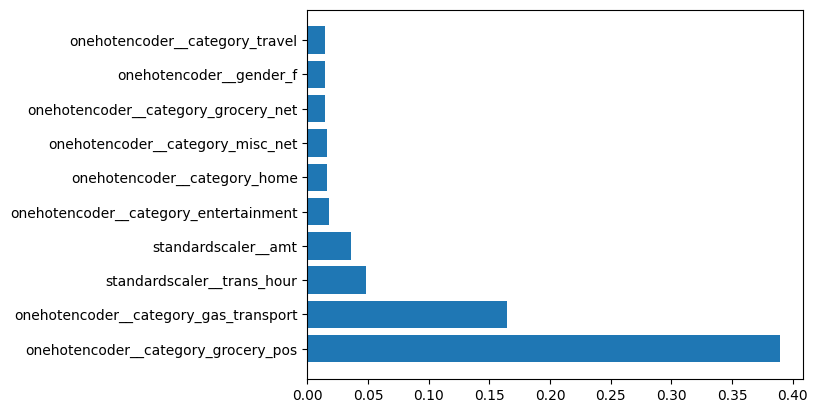

In [53]:
from matplotlib import pyplot as plt
n_top_features = 10
sorted_idx = xgb.feature_importances_.argsort()[::-1]
plt.barh(f_names[sorted_idx][:n_top_features ], xgb.feature_importances_[sorted_idx][:n_top_features ])

The most imporatant features are categories: grocery and gas which are followed by the transaction hour and the ammount.

## Conclusion and References

### Conclusion:

- The dataset contained more than 18,50,000(train=1296675, test=555719) rows and 23 columns.

- The dataset did not have any mising values, hence the pre-processing consisted of scaling and encoding. As a result of encoding the number of ciolumns increased to 80.

- Since this was an imbalanced dataset, we had to generate synthetic rows to create a balance. This was done using SMOTE.

- The models were trained on a highly skewed data set with large outliers. Our target variable('is_fraud') didn't seem to have a linear relationship with the input variables.

- We performed the same pre-processing on the test data as well, the final shape of the test data was 555719 x 80.

- We have chosen precision as our evaluation metric as it fits the given scenario.

- The baseline model was set as a decision tree, however it overfitted the training data and could only achieve precision value of: 73.01 %.

- We aimed to increase the presion by tuning the hyper-parameters of model 2 and 3 i.e. RandomForest and XGBoost. We found a significant improvement in precision ''

- The average time taken to complete one random forest model at default parameters was around 17mins. The same value was around 24mins which there was no scaling done. (These values may not be present in the above notebook as I have observed these in my initial testing of the model). The time taken to run BayesSearchRandomCV was around 1 hour 42 mins.

- The best precision was found in the XGBoost model which was regriuosly tuned using the BayesSearchCV, the precision was around 93.59%.

- **Most frauds occur in grocery stores wherein people buy grocery followed by gas stations, apart from that transaction hour also plays an important role during which the purchase is made, which is followed by the transaction ammount.**

### References:

- Dataset from [Kaggle](https://www.kaggle.com/datasets/kartik2112/fraud-detection)

- A similar case on study on [GeeksForGeek](https://www.geeksforgeeks.org/ml-credit-card-fraud-detection/)

- Github Repository for the actual simulator which was used to create data can be found [here.](https://github.com/namebrandon/Sparkov_Data_Generation/blob/master/profiles/adults_2550_female_rural.json)